<a href="https://colab.research.google.com/github/fallahibagaskara/news-dataset-cleanup/blob/main/News_Dataset_Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import package/libary**

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import re

**Import RAW dataset**

In [ ]:
TURNBACKHOAX_CSV = './dataset/news/raw/turnbackhoax_10k_raw_data.csv'

In [ ]:
df = pd.read_csv(TURNBACKHOAX_CSV)

df

,Title,Timestamp,FullText,Tags,Author,Url
0,[PENIPUAN] Tautan Pendaftaran Lowongan Kerja A...,"Juli 26, 2025","Akun TikTok ""INFO LOKER PT.ADARO"" pada Kamis (...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/penipuan-ta...
1,[SALAH] Pelatih Timnas U-23 RI Gerald Vanenbur...,"Juli 26, 2025","Kanal YouTube ""GARUDA SPACE"" pada Sabtu (19/7/...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-pelat...
2,"[SALAH] Video ""Penampakan Rudal TNI AU Garuda ...","Juli 26, 2025","Pada Senin (29/6/2025) kanal YouTube ""@NoraYup...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-video...
3,"[SALAH] Video ""Helikopter Terjatuh di Parapat,...","Juli 26, 2025","Pada Kamis (12/6/2025) akun Facebook ""Julima S...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-video...
4,[SALAH] Pembakar Ruko Pramuka Bayaran Jokowi D...,"Juli 26, 2025","Pada Minggu (20/7/2025) akun Facebook ""Rico Sa...",Fitnah / Hasut / Hoax,Tim Kalimasada,https://turnbackhoax.id/2025/07/26/salah-pemba...
...,...,...,...,...,...,...
9995,[SALAH] Aplikasi 'FlixOnline' Menawarkan Akses...,"April 12, 2021",Hasil Periksa Fakta Khairunnisa Andini (Univer...,Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/04/12/salah-aplik...
9996,"[SALAH] ""TMII sekarang diambil si Megawati mad...","April 12, 2021",Bukan diambil Megawati dan dijual ke Cina. Sel...,Fitnah / Hasut / Hoax,Adi Syafitrah,https://turnbackhoax.id/2021/04/12/salah-tmii-...
9997,"[SALAH] Rayakan Pembukaan Toko ke-1000, Alfama...","April 11, 2021",Hasil Periksa Fakta Renanda Dwina Putri (Anggo...,Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/04/11/salah-rayak...
9998,"[SALAH] Judul Berita Reqnews ""Xanana Gusmao Me...","April 11, 2021",Hasil Periksa Fakta Nadine Salsabila Naura Mar...,Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2021/04/11/salah-judul...


**Check null**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10000 non-null  object
 1   Timestamp  10000 non-null  object
 2   FullText   10000 non-null  object
 3   Tags       10000 non-null  object
 4   Author     10000 non-null  object
 5   Url        10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


**Drop data if fulltext = null**

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10000 non-null  object
 1   Timestamp  10000 non-null  object
 2   FullText   10000 non-null  object
 3   Tags       10000 non-null  object
 4   Author     10000 non-null  object
 5   Url        10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


**Cek Apakah Kata 'Adaro' Ada di Judul Pertama**

In [ ]:

a = 'Adaro' in df['Title'][0]
print(df['Title'][0])
print(a)

[PENIPUAN] Tautan Pendaftaran Lowongan Kerja Adaro Indonesia
True


**Retrieve Narasi from News**

In [ ]:
def retrieve_narasi_from_text(text):
    narasi = ''
    narasi_start_splitters = ['NARASI:', 'Narasi(Diterjemahkan ke Bahasa Indonesia)', '[NARASI]:', 'Narasi :', '[NARASI]', 'Narasi:', 'NARASI :']
    for s in narasi_start_splitters:
        if s in text:
            narasi = text.split(s)[1]
            break

    narasi_ended = ''
    narasi_end_splitter = ['PENJELASAN:', '[PENJELASAN]:', 'Penjelasan :', '[PENJELASAN]', 'PENJELASAN', 'PENJELASAN :']
    for s in narasi_end_splitter:
        if s in text:
            narasi_ended = narasi.split(s)[0]
            break

    if len(narasi_ended) > 0:
        narasi = narasi_ended

    lanjutan_narasi = ''
    lanjutan_narasi_splitters = ['(Lanjutan Narasi)']
    for s in lanjutan_narasi_splitters:
        if s in text:
            lanjutan_narasi = text.split(s)[1]

    narasi_lengkap = narasi + ' ' + lanjutan_narasi
    return narasi_lengkap

In [ ]:
# df_with_index = df.reset_index()
# news_with_narasi = []

# for _, row in tqdm(df_with_index[['index', 'FullText']].iterrows(), total=df_with_index.shape[0]):
#     index = row['index']
#     text = row['FullText']
#     if not str(text) == 'nan':
#         narasi = retrieve_narasi_from_text(text)
#     else:
#         narasi = ''
#     news_with_narasi.append([index, text, narasi])

df['Narasi'] = df['FullText'].map(lambda x: retrieve_narasi_from_text(x))
df.head()

,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi
0,[PENIPUAN] Tautan Pendaftaran Lowongan Kerja A...,"Juli 26, 2025","Akun TikTok ""INFO LOKER PT.ADARO"" pada Kamis (...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/penipuan-ta...,1,
1,[SALAH] Pelatih Timnas U-23 RI Gerald Vanenbur...,"Juli 26, 2025","Kanal YouTube ""GARUDA SPACE"" pada Sabtu (19/7/...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-pelat...,1,
2,"[SALAH] Video ""Penampakan Rudal TNI AU Garuda ...","Juli 26, 2025","Pada Senin (29/6/2025) kanal YouTube ""@NoraYup...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-video...,0,
3,"[SALAH] Video ""Helikopter Terjatuh di Parapat,...","Juli 26, 2025","Pada Kamis (12/6/2025) akun Facebook ""Julima S...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-video...,0,
4,[SALAH] Pembakar Ruko Pramuka Bayaran Jokowi D...,"Juli 26, 2025","Pada Minggu (20/7/2025) akun Facebook ""Rico Sa...",Fitnah / Hasut / Hoax,Tim Kalimasada,https://turnbackhoax.id/2025/07/26/salah-pemba...,1,


**Check narasi**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      10000 non-null  object
 1   Timestamp  10000 non-null  object
 2   FullText   10000 non-null  object
 3   Tags       10000 non-null  object
 4   Author     10000 non-null  object
 5   Url        10000 non-null  object
 6   politik    10000 non-null  int64 
 7   Narasi     10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


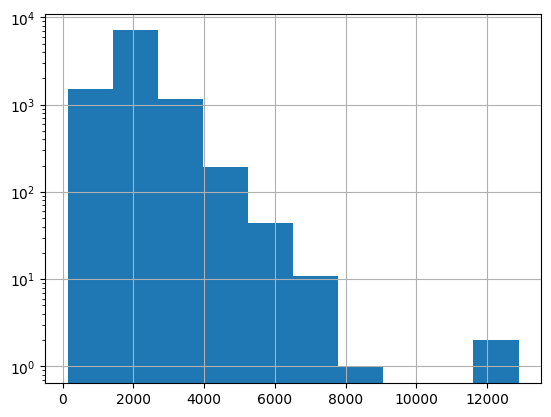

In [ ]:
df['FullText'].str.len().hist().set_yscale('log')

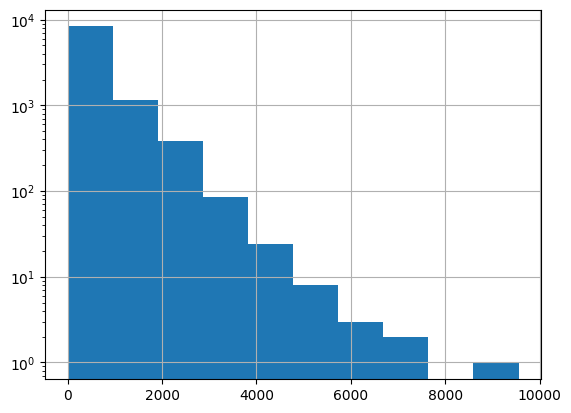

In [ ]:
df['Narasi'].str.len().hist().set_yscale('log')

**Cleanup narasi**

In [ ]:
def clean_narasi(text):
    # remove multiple used of '='
    text = text.replace('=', ' ')

    # remove '\n', '\r', and '\t'
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')

    # remove non ascii
    text = ''.join([i if ord(i) < 128 else ' ' for i in text])

    # remove multiple space
    text = re.sub(' +', ' ', text)

    # remove whitespace in start and end
    text = text.strip()
    return text
df['Clean Narasi'] = df['Narasi'].map(lambda x: clean_narasi(x))
df.head(5)

,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,Clean Narasi
0,[PENIPUAN] Tautan Pendaftaran Lowongan Kerja A...,"Juli 26, 2025","Akun TikTok ""INFO LOKER PT.ADARO"" pada Kamis (...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/penipuan-ta...,1,,
1,[SALAH] Pelatih Timnas U-23 RI Gerald Vanenbur...,"Juli 26, 2025","Kanal YouTube ""GARUDA SPACE"" pada Sabtu (19/7/...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-pelat...,1,,
2,"[SALAH] Video ""Penampakan Rudal TNI AU Garuda ...","Juli 26, 2025","Pada Senin (29/6/2025) kanal YouTube ""@NoraYup...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-video...,0,,
3,"[SALAH] Video ""Helikopter Terjatuh di Parapat,...","Juli 26, 2025","Pada Kamis (12/6/2025) akun Facebook ""Julima S...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-video...,0,,
4,[SALAH] Pembakar Ruko Pramuka Bayaran Jokowi D...,"Juli 26, 2025","Pada Minggu (20/7/2025) akun Facebook ""Rico Sa...",Fitnah / Hasut / Hoax,Tim Kalimasada,https://turnbackhoax.id/2025/07/26/salah-pemba...,1,,


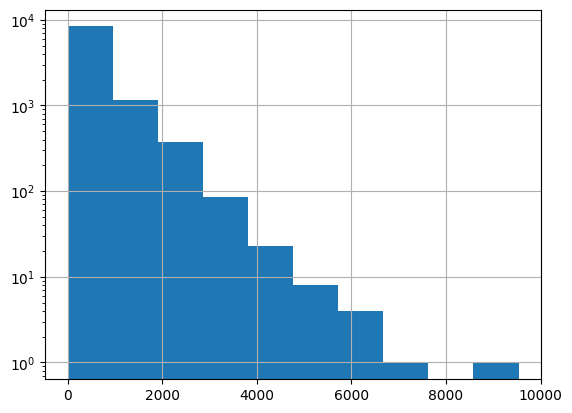

In [ ]:
df['Clean Narasi'].str.len().hist().set_yscale('log')

**Check short narasi**

In [ ]:
df_short_narasi = df[df['Clean Narasi'].str.len() <= 10]
df_good_narasi = df[df['Clean Narasi'].str.len() > 10]
df_good_narasi.shape, df_short_narasi.shape

((7621, 9), (2379, 9))

In [ ]:
print(df_good_narasi.sample(1, random_state=1)[['Clean Narasi']].values[0])

['"Pintu perbatasan Rafah masih ditutup oleh Mesir hingga bantuan kemanusiaan untuk Palestina akhirnya harus dibuang karena sudah kadaluarsa. Sementara rakyat Palestina kelaparan. Dimana hati nuranimu wahai pemimpin Arab?" Penjelasan: Sebuah video beredar di Facebook diklaim merupakan bantuan kemanusiaan untuk Palestina yang terhalang masuk di Rafah, perbatasan Mesir-Palestina, hingga kedaluwarsa karena Mesir menutup akses masuknya bantuan kemanusiaan tersebut. Setelah ditelusuri klaim tersebut salah. Dilansir dari Kompas.com, video tersebut adalah pembuangan ayam busuk dari 25 truk yang rencananya akan didistribusikan di sekitar distrik Al-Qassin, Saudi Arabia, dan sudah lama beredar di internet sejak 2016. Tidak ada kaitannya dengan bantuan kemanusiaan yang akan dikirimkan ke Palestina. Dengan demikian, video bantuan kemanusiaan untuk Palestina di perbatasan Mesir dibuang karena kedaluwarsa adalah tidak benar dengan kategori Konten yang Menyesatkan. Referensi: https://www.kompas.com/

**Add hoax label**

In [ ]:
df['hoax'] = 1

In [ ]:
df.head(3)

,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,Clean Narasi,hoax
0,[PENIPUAN] Tautan Pendaftaran Lowongan Kerja A...,"Juli 26, 2025","Akun TikTok ""INFO LOKER PT.ADARO"" pada Kamis (...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/penipuan-ta...,1,,,1
1,[SALAH] Pelatih Timnas U-23 RI Gerald Vanenbur...,"Juli 26, 2025","Kanal YouTube ""GARUDA SPACE"" pada Sabtu (19/7/...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-pelat...,1,,,1
2,"[SALAH] Video ""Penampakan Rudal TNI AU Garuda ...","Juli 26, 2025","Pada Senin (29/6/2025) kanal YouTube ""@NoraYup...",Fitnah / Hasut / Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2025/07/26/salah-video...,0,,,1


In [ ]:
df.to_csv("dataset_turnbackhoax_10_cleaned.csv")